## PROJECT FINAL REPORT - GROUP ID:10


---



Begüm Altunbaş 26824


Ülkü Eylül Şahin 26786

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path_prefix = "/content/drive/My Drive"

%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive




# Introduction
Problem Description:

Our hypothesis is that quality shops and restaurants,education status of the residents and crime rates affect the quality of the neighborhood, which leads to the price and rate increase/decrease of Airbnb apartments in that neighborhood. We will try to prove this hypothesis by utilizing different datasets and then discuss the outcomes

# Dataset A

We obtained Airbnb data from [New York City Airbnb open data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data://) in order to analyze airbnb prices according to different neighbourhoods.

In [ ]:
airbnb_df = pd.read_csv(join(path_prefix, "AB_NYC_2019.csv"))
airbnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365





> Data Clearization

Since we will only use neighbourhood and prices data, we are cleaning irrelevant data by only reading neighbourhood and price columns




In [ ]:
fields = ["neighbourhood_group","neighbourhood", "price", "minimum_nights",  "number_of_reviews", "reviews_per_month"]

airbnb_df = pd.read_csv(join(path_prefix, "AB_NYC_2019.csv"), usecols = fields)
airbnb_df

,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month
0,Brooklyn,Kensington,149,1,9,0.21
1,Manhattan,Midtown,225,1,45,0.38
2,Manhattan,Harlem,150,3,0,NaN
3,Brooklyn,Clinton Hill,89,1,270,4.64
4,Manhattan,East Harlem,80,10,9,0.10
...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,70,2,0,NaN
48891,Brooklyn,Bushwick,40,4,0,NaN
48892,Manhattan,Harlem,115,10,0,NaN
48893,Manhattan,Hell's Kitchen,55,1,0,NaN


### Data Preprocessing
Lets check for nan values with price 0.

In [ ]:

airbnb_df = airbnb_df.dropna(subset=["price"])
airbnb_df = airbnb_df.dropna(subset=["reviews_per_month"])

We are clearing NaN values in order to get rid of irrelevant data.

# Dataset B



We obtained bachelors degree data from [Population with a bachelor's degree](http://app.coredata.nyc/?mlb=false&ntii=pop_edu_collp_pct&ntr=Sub-Borough%20Area&mz=14&vtl=https%3A%2F%2Fthefurmancenter.carto.com%2Fu%2Fnyufc%2Fapi%2Fv2%2Fviz%2F98d1f16e-95fd-4e52-a2b1-b7abaf634828%2Fviz.json&mln=true&mlp=true&mlat=40.759032&ptsb=&nty=2018&mb=roadmap&pf=%7B%22subsidies%22%3Atrue%7D&md=table&mlv=false&mlng=-73.974458&btl=Borough&atp=neighborhoods)  in order to analyze if the education level of the neighborhoods indicate to the quality of the neighborhoods, which leads the airbnb prices in that neighborhood to increase.

In [ ]:
bachelor_df = pd.read_csv(join(path_prefix, "bachelor.csv"))
bachelor_df.head(100)

,short_name,long_name,Sub-Borough Area,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,pop_edu_collp_pct,Population aged 25+ with a bachelor's degree o...,East Harlem,0.142375,0.257352,0.219926,0.218158,0.236879,0.257041,0.275105,0.264196,0.321499,0.349352,0.272822,0.320316,0.343960,0.272638,0.350870
1,pop_edu_collp_pct,Population aged 25+ with a bachelor's degree o...,Washington Heights/Inwood,0.190476,0.269575,0.256313,0.295955,0.288193,0.325298,0.296568,0.299906,0.291754,0.331413,0.302879,0.327900,0.342889,0.346883,0.352388
2,pop_edu_collp_pct,Population aged 25+ with a bachelor's degree o...,Mott Haven/Hunts Point,0.048361,0.062977,0.079793,0.081128,0.082849,0.079803,0.081037,0.092497,0.076373,0.105149,0.090745,0.109612,0.098805,0.097142,0.125377
3,pop_edu_collp_pct,Population aged 25+ with a bachelor's degree o...,Morrisania/Belmont,0.076464,0.083200,0.077076,0.083083,0.112708,0.099121,0.083160,0.092016,0.118354,0.140609,0.118747,0.143898,0.133811,0.133291,0.145174
4,pop_edu_collp_pct,Population aged 25+ with a bachelor's degree o...,Highbridge/South Concourse,0.078192,0.079365,0.096095,0.088999,0.112455,0.126396,0.093757,0.105889,0.147824,0.128131,0.162636,0.162695,0.139614,0.176039,0.147264
5,pop_edu_collp_pct,Population aged 25+ with a bachelor's degree o...,University Heights/Fordham,0.077123,0.086326,0.100449,0.122414,0.116137,0.122517,0.110235,0.093727,0.116316,0.159057,0.126378,0.134106,0.114526,0.114868,0.117464
6,pop_edu_collp_pct,Population aged 25+ with a bachelor's degree o...,Kingsbridge Heights/Mosholu,0.146265,0.204819,0.162856,0.152815,0.159965,0.147915,0.137459,0.180464,0.173296,0.141833,0.179763,0.198719,0.135603,0.171753,0.166991
7,pop_edu_collp_pct,Population aged 25+ with a bachelor's degree o...,Riverdale/Kingsbridge,0.342662,0.354502,0.399154,0.387043,0.414216,0.430274,0.402330,0.342995,0.377744,0.371326,0.398690,0.432882,0.375520,0.387317,0.385051
8,pop_edu_collp_pct,Population aged 25+ with a bachelor's degree o...,Soundview/Parkchester,0.123243,0.163324,0.140100,0.124805,0.158284,0.178897,0.172379,0.156965,0.152205,0.152179,0.160895,0.166710,0.155332,0.183028,0.201304
9,pop_edu_collp_pct,Population aged 25+ with a bachelor's degree o...,Throgs Neck/Co-op City,0.190689,0.200646,0.195175,0.225050,0.222704,0.267345,0.210672,0.254103,0.229223,0.256000,0.271717,0.248895,0.255065,0.284463,0.276372





> Data Clearization

Since we will only use neighbourhood and population with a bachelors degree in 2018 data, we are cleaning irrelevant data by only reading neighbourhood and 2018 columns








In [ ]:
columns = ["Sub-Borough Area","2018"]

bachelor_df = pd.read_csv(join(path_prefix, "bachelor.csv"), usecols= columns)
bachelor_df.head(15)

,Sub-Borough Area,2018
0,East Harlem,0.350870
1,Washington Heights/Inwood,0.352388
2,Mott Haven/Hunts Point,0.125377
3,Morrisania/Belmont,0.145174
4,Highbridge/South Concourse,0.147264
5,University Heights/Fordham,0.117464
6,Kingsbridge Heights/Mosholu,0.166991
7,Riverdale/Kingsbridge,0.385051
8,Soundview/Parkchester,0.201304
9,Throgs Neck/Co-op City,0.276372


Since looking at 55 neighborhoods in a chart would be difficult, we created a chart with sample 20 neighborhoods, and sorted their education levels from high to low. In following chapters, we will compare them with airbnb prices to see if they are correlated.

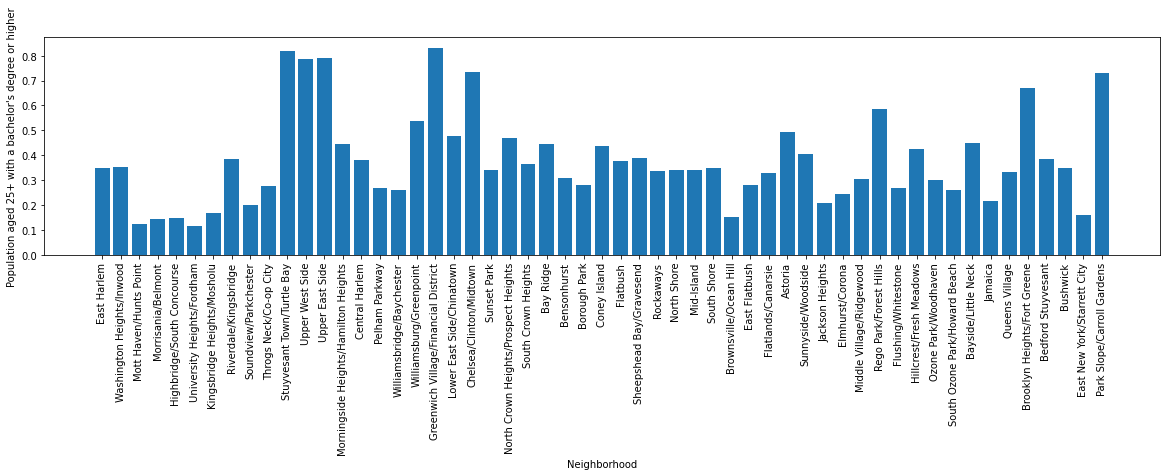

In [ ]:
x=[]
y=[]

x=list(bachelor_df["Sub-Borough Area"])
y=list(bachelor_df["2018"])

fig_size = plt.rcParams["figure.figsize"]
plt.bar(x,y)
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
fig_size[0]= 20
plt.ylabel("Population aged 25+ with a bachelor's degree or higher")
plt.show()

# Dataset C

This is our crime rate data in nyc according to neighbourhood groups, and neighbourhoods from years 2006 to 2018. We obtained this data from [Core Data NYC](http://app.coredata.nyc/?mlb=false&ntii=&ntr=Community%20District&mz=14&vtl=https%3A%2F%2Fthefurmancenter.carto.com%2Fu%2Fnyufc%2Fapi%2Fv2%2Fviz%2F98d1f16e-95fd-4e52-a2b1-b7abaf634828%2Fviz.json&mln=true&mlp=true&mlat=40.718&ptsb=&nty=2018&mb=roadmap&pf=%7B%22subsidies%22%3Atrue%7D&md=table&mlv=false&mlng=-73.996&btl=Borough&atp=neighborhoods)

In [ ]:
crime_df=pd.read_csv(join(path_prefix,"communitydistrict-seriouscrimerateper1000residents.csv"))
crime_df

,short_name,long_name,Community District,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 01 - Financial District,43.608367,43.027310,38.785590,35.328298,17.760504,18.432877,17.350520,17.252124,16.612549,18.482076,18.383679,17.940897,16.120568
1,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 02 - Greenwich Village/Soho,34.482759,33.043740,31.379203,29.789839,29.305901,28.483825,29.805812,30.383487,27.606203,28.183878,25.795414,25.650995,27.495112
2,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 03 - Lower East Side/Chinatown,14.975031,15.200083,15.108846,14.196476,13.774138,13.516907,14.515210,14.649951,13.670021,13.792512,14.974552,14.349847,13.915003
3,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 04 - Clinton/Chelsea,34.385395,32.133426,32.636404,28.658307,23.013221,23.429706,24.185191,24.688847,24.446704,23.594363,23.846191,23.468449,23.797763
4,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 05 - Midtown,160.193513,159.421277,149.155083,134.596166,105.703172,97.846070,100.613473,99.510383,97.459021,100.226424,98.542759,90.279256,89.737387
5,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 06 - Stuyvesant Town/Turtle Bay,15.291733,14.586638,15.100770,13.624479,12.070475,11.334898,11.755228,11.867316,11.250832,11.888332,11.348909,11.166766,11.468002
6,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 07 - Upper West Side,11.897024,11.049644,10.852243,9.350069,9.048995,8.207228,9.680320,9.197260,8.857684,8.766811,8.943774,9.312047,8.752463
7,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 08 - Upper East Side,12.563173,11.867522,10.628251,8.794682,8.439433,8.498545,9.221535,9.398872,8.634958,8.762277,9.012368,8.798654,8.803201
8,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 09 - Morningside Heights/Hamilton,15.493538,14.938599,13.989832,11.966990,12.650531,12.224007,13.712305,13.403755,11.942682,11.407258,11.343733,11.434483,12.423657
9,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 10 - Central Harlem,22.677833,19.475488,20.371771,18.327125,17.144388,17.066616,17.118464,16.487647,15.787700,17.818411,17.999879,16.798735,16.755528


Since we have more data than we need, we would like to take a sample out of it thefere we only take year 2018.

In [ ]:
crime_df=crime_df.drop(columns="short_name")
crime_df=crime_df.drop(columns="long_name")
crime_df=crime_df.drop(columns="2006")
crime_df=crime_df.drop(columns="2007")
crime_df=crime_df.drop(columns="2008")
crime_df=crime_df.drop(columns="2009")
crime_df=crime_df.drop(columns="2010")
crime_df=crime_df.drop(columns="2011")
crime_df=crime_df.drop(columns="2012")
crime_df=crime_df.drop(columns="2013")
crime_df=crime_df.drop(columns="2014")
crime_df=crime_df.drop(columns="2015")
crime_df=crime_df.drop(columns="2016")
crime_df=crime_df.drop(columns="2017")
crime_df

,Community District,2018
0,MN 01 - Financial District,16.120568
1,MN 02 - Greenwich Village/Soho,27.495112
2,MN 03 - Lower East Side/Chinatown,13.915003
3,MN 04 - Clinton/Chelsea,23.797763
4,MN 05 - Midtown,89.737387
5,MN 06 - Stuyvesant Town/Turtle Bay,11.468002
6,MN 07 - Upper West Side,8.752463
7,MN 08 - Upper East Side,8.803201
8,MN 09 - Morningside Heights/Hamilton,12.423657
9,MN 10 - Central Harlem,16.755528


We plot crime rates according to neighbourhoods to visualize it better.



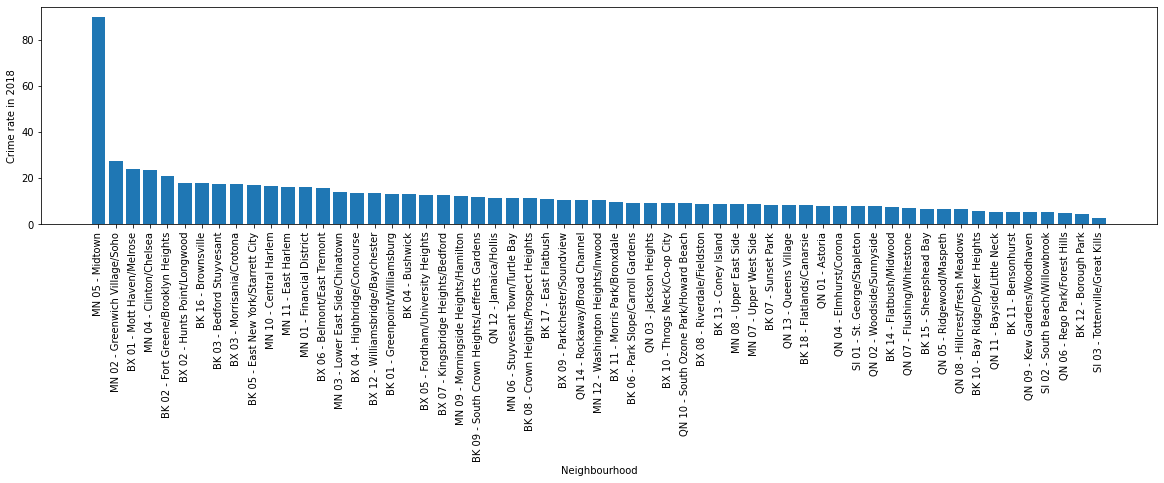

In [ ]:
sorted_crime=crime_df.sort_values(by=[ '2018'],ascending=False)

usecols1=sorted_crime [['Community District','2018']]



sample=sorted_crime.iloc[0:200]

location=sample["Community District"]
crimerate=sample["2018"]
x=[]
y=[]


x=list(location)
y=list(crimerate)

fig_size = plt.rcParams["figure.figsize"]
plt.bar(x,y)
plt.xlabel("Neighbourhood")
plt.xticks(rotation=90)
fig_size[0]=20
plt.ylabel("Crime rate in 2018")
plt.show()

# DATA EXPORATION

Now we are going to calculate average apartment prices of different neighbourhood groups, and compare the results with the crime rate datas we collected before.

In [ ]:
#df = pd.read_csv(join(path_prefix, "AB_NYC_2019.csv"))
newdf1=airbnb_df.loc[airbnb_df["neighbourhood_group"].str.contains ("Manhattan"),"price"]

total_price= newdf1.sum()
total_apartments_manhattan= len(newdf1)
mean_manhattan_price=newdf1.sum()/len(newdf1)


newdf2=airbnb_df.loc[airbnb_df["neighbourhood_group"].str.contains ("Brooklyn"),"price"]
total_price= newdf2.sum()
total_apartments_brooklyn= len(newdf2)
mean_brooklyn_price=newdf2.sum()/len(newdf2)


newdf3=airbnb_df.loc[airbnb_df["neighbourhood_group"].str.contains ("Queens"),"price"]
total_price= newdf3.sum()
total_apartments_queens= len(newdf3)
mean_queens_price=newdf3.sum()/len(newdf3)


newdf4=airbnb_df.loc[airbnb_df["neighbourhood_group"].str.contains ("Bronx"),"price"]
total_price= newdf4.sum()
total_apartments_bronx= len(newdf4)
mean_bronx_price=newdf4.sum()/len(newdf4)

newdf5=airbnb_df.loc[airbnb_df["neighbourhood_group"].str.contains ("Staten Island"),"price"]
total_price= newdf5.sum()
total_apartments_si= len(newdf5)
mean_si_price=newdf5.sum()/len(newdf5)

x=["Manhattan","Bronx","Brooklyn","Queens","Staten Island"]
y=[mean_manhattan_price,mean_bronx_price,mean_brooklyn_price,mean_queens_price,mean_si_price]


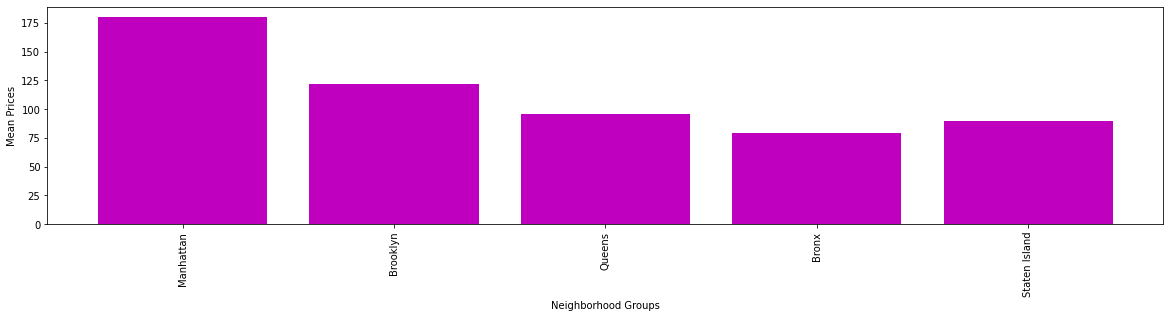

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
plt.bar(x,y, color= "m")
plt.xlabel("Neighborhood Groups")
plt.xticks(rotation=90)
fig_size[0]= 20
plt.ylabel("Mean Prices")
plt.show()

As it can be seen on the chart, Manhattan has the highest average price meanwhile bronx has the lowest. Lets interpret crime rates data and see if they are correlated or not.

In [ ]:
borough_crime= pd.read_csv(join(path_prefix,"borough-seriouscrimerateper1000residents.csv"))

borough_crime[["Borough","2018"]]

,Borough,2018
0,Manhattan,16.456350
1,Bronx,13.675701
2,Brooklyn,10.812067
3,Queens,8.122191
4,Staten Island,5.549525


In [ ]:

NeighbourhoodGroup=borough_crime["Borough"]
crimerateTotal=borough_crime["2018"]

b=[]

b=list(crimerateTotal)

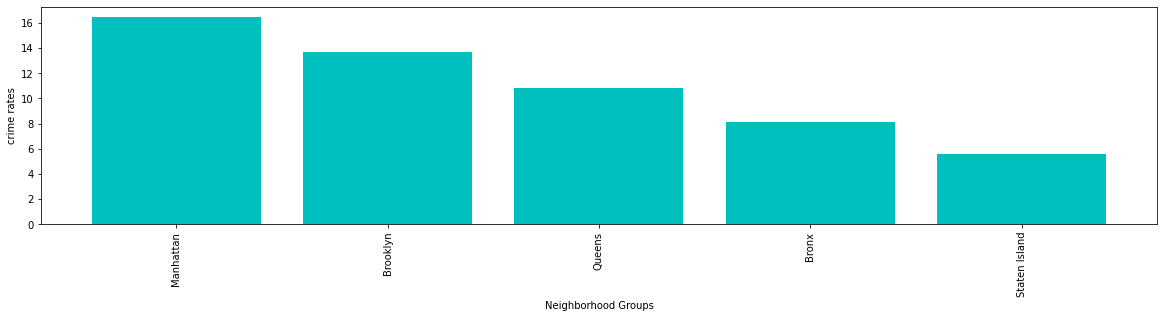

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
plt.bar(x,b ,color= "c")
plt.xlabel("Neighborhood Groups")
plt.xticks(rotation=90)
fig_size[0]= 10
plt.ylabel("crime rates")
plt.show()

As it can be seen from the chart, Bronx has very high crime rates which might lead to airbnb price dropping. But what we expected did not occur, because **Manhattan** has the highest mean of crime rates and still is the most expensive neighbourhood group.

In [ ]:
borough_bachelors= pd.read_csv(join(path_prefix, "borough-populationaged25withabachelorsdegreeorhigher.csv"))

borough_bachelors[["Borough","2018"]]

,Borough,2018
0,Manhattan,0.613568
1,Bronx,0.207099
2,Brooklyn,0.388641
3,Queens,0.334559
4,Staten Island,0.342668


In [ ]:
bachelorsTotal=borough_bachelors["2018"]

z=[]

z=list(bachelorsTotal)

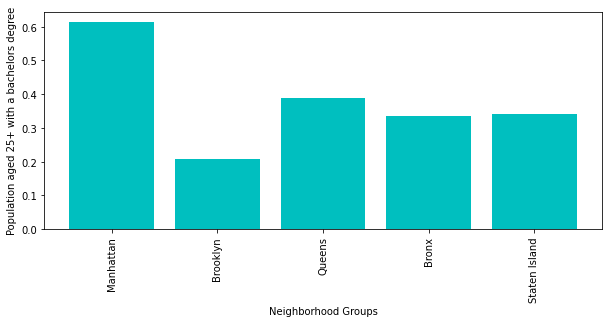

In [ ]:

plt.bar(x,z, color="c")
plt.xlabel("Neighborhood Groups")
plt.xticks(rotation=90)
fig_size[0]= 10
plt.ylabel("Population aged 25+ with a bachelors degree")
plt.show()

**Manhattan** shines out in education level graph just as it did in the airbnb prices graph. Eventhough this correlation is definetly stronger than crime rate - prices correlation, it is still does not work 100%, since brooklyn has the lowest education level but doesn't have the lowest prices.

# Merging and Comparing Datasets

In [ ]:
def getcrimerate(neighbourhood):
    for x,y in crime_df.iterrows():
        if neighbourhood in y["Community District"]:
            return y["2018"]
    
  
airbnb_df["Crime Rates"]=airbnb_df["neighbourhood"].apply(getcrimerate)
airbnb_df.head()

,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,Crime Rates
0,Brooklyn,Kensington,149,1,9,0.21,NaN
1,Manhattan,Midtown,225,1,45,0.38,89.737387
3,Brooklyn,Clinton Hill,89,1,270,4.64,NaN
4,Manhattan,East Harlem,80,10,9,0.10,16.430035
5,Manhattan,Murray Hill,200,3,74,0.59,NaN


In [ ]:
def get_bachelors_rate(neighbourhood):
    for x,y in bachelor_df.iterrows():
        if neighbourhood in y["Sub-Borough Area"]:
            return y["2018"]

airbnb_df["Pop with bachelor's degree rate"]=airbnb_df["neighbourhood"].apply(get_bachelors_rate)
airbnb_df.head()

,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,Crime Rates,Pop with bachelor's degree rate
0,Brooklyn,Kensington,149,1,9,0.21,NaN,NaN
1,Manhattan,Midtown,225,1,45,0.38,89.737387,0.733121
3,Brooklyn,Clinton Hill,89,1,270,4.64,NaN,NaN
4,Manhattan,East Harlem,80,10,9,0.10,16.430035,0.350870
5,Manhattan,Murray Hill,200,3,74,0.59,NaN,NaN


Lets's merge datasets with visualizations.

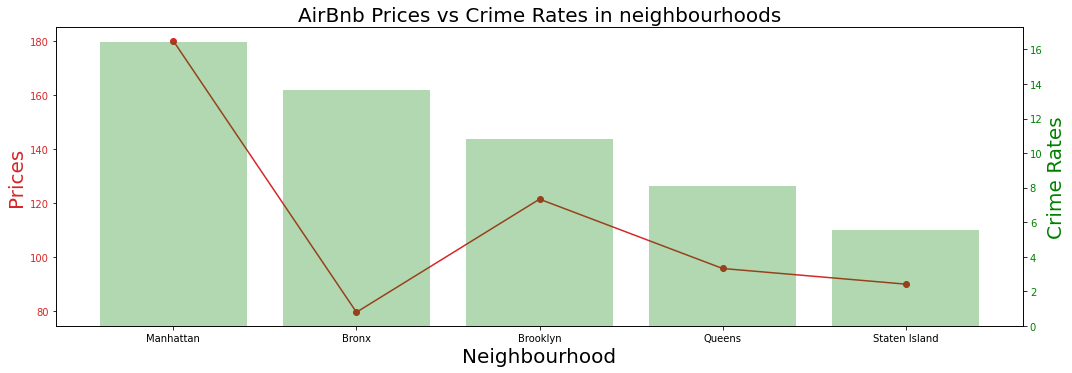

In [ ]:
xaxis =borough_crime["Borough"].tolist()
t = xaxis

data2= b #crime list
data1 = y #price average

fig, ax1 = plt.subplots(figsize=(15,5))
color = 'tab:red'

ax1.set_xlabel('Neighbourhood',fontsize=20)
ax1.set_ylabel('Prices', color=color, fontsize=20)

ax1.plot(t, data1, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'green'

ax2.set_ylabel('Crime Rates', color=color,fontsize=20) 
ax2.bar(t, data2, color=color,alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  
plt.title("AirBnb Prices vs Crime Rates in neighbourhoods", fontsize = 20)
plt.show()


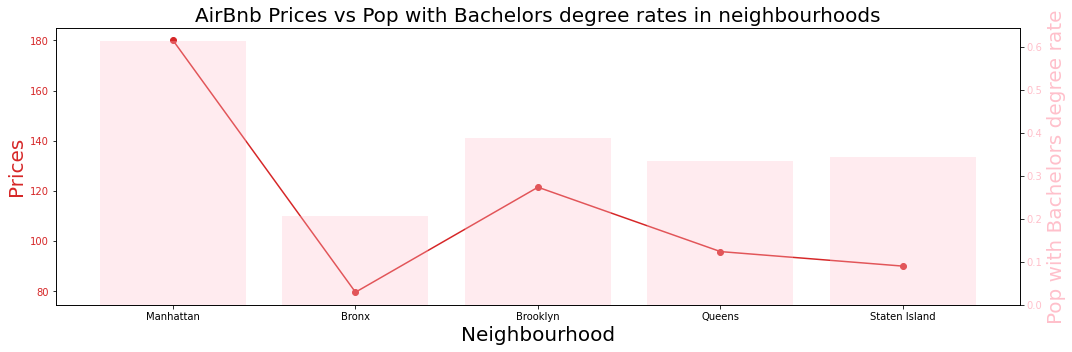

In [ ]:
xaxis =borough_crime["Borough"].tolist()
t = xaxis

data2= z #bachelor list
data1 = y #price average

fig, ax1 = plt.subplots(figsize=(15,5))
color = 'tab:red'

ax1.set_xlabel('Neighbourhood',fontsize=20)
ax1.set_ylabel('Prices', color=color, fontsize=20)

ax1.plot(t, data1, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'pink'

ax2.set_ylabel('Pop with Bachelors degree rate', color=color,fontsize=20) 
ax2.bar(t, data2, color=color,alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  
plt.title("AirBnb Prices vs Pop with Bachelors degree rates in neighbourhoods", fontsize = 20)
plt.show()

In [ ]:
airbnb_df = airbnb_df.dropna(subset=["Crime Rates"])
airbnb_df = airbnb_df.dropna(subset=["Pop with bachelor's degree rate"])
airbnb_df=airbnb_df.drop(columns="neighbourhood_group")
airbnb_df=airbnb_df.drop(columns="neighbourhood")

#we dropped NaN values for our convinience
airbnb_df.head(100)

,price,minimum_nights,number_of_reviews,reviews_per_month,Crime Rates,Pop with bachelor's degree rate
1,225,1,45,0.38,89.737387,0.733121
4,80,10,9,0.10,16.430035,0.350870
8,79,2,118,0.99,8.752463,0.786002
9,150,1,160,1.33,13.915003,0.478250
10,135,5,53,0.43,8.752463,0.786002
...,...,...,...,...,...,...
168,165,2,150,1.40,9.454775,0.732153
170,50,2,47,0.94,13.139904,0.349257
171,40,1,219,2.04,13.636891,0.147264
172,150,2,193,1.78,13.259534,0.536457


# MACHINE LEARNING MODELS

We will implement KNN and Decision Tree models. For both, we have 2 options; using classifier or regressor. We chose to use regressor instead of categorizing the prices and using the classifier.

# 1) KNN Implementation

Determining the best K value

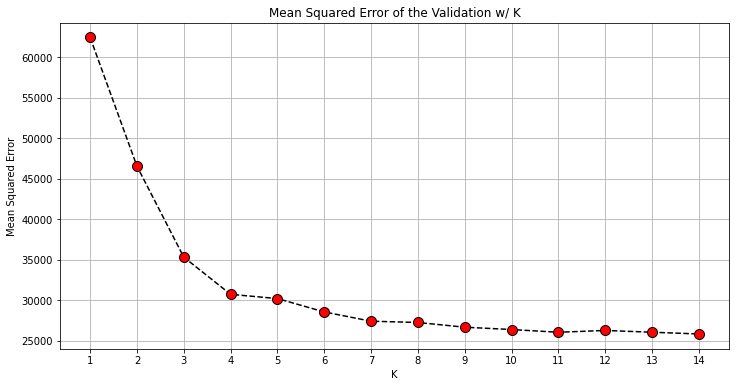

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#airbnb_df=airbnb_df.drop(columns="neighbourhood_group")
#airbnb_df=airbnb_df.drop(columns="neighbourhood")

x = airbnb_df.drop("price", axis=1)
y = airbnb_df["price"]

X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.20, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)


K_range = np.arange(1, 15)
mse_list = []

for k in K_range:
  # create a new model with current K
  knn = KNeighborsRegressor(k, metric="euclidean")
  # fit training data
  knn.fit(X_train, y_train)
  # predict the validation data
  y_pred = knn.predict(X_val)
  # obtain the mse value
  mse = mean_squared_error(y_val, y_pred)
  mse_list.append(mse)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, mse_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Mean Squared Error of the Validation w/ K')  
plt.xlabel('K')  
plt.ylabel('Mean Squared Error')
plt.xticks(K_range)
plt.grid()
plt.show()

Best k value is 14, because mean squared error is lowest for 14.

Now let's calculate mean absolute error, mean squared error and RMSE values for the best k value, 14
.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#airbnb_df=airbnb_df.drop(columns="neighbourhood_group")
#airbnb_df=airbnb_df.drop(columns="neighbourhood")

#x= airbnb_df.drop("neighbourhood_group", axis=1)
#x= airbnb_df.drop("neighbourhood", axis=1)

# 80% for training and 20% for testing-validation
x = airbnb_df.drop("price", axis=1)
y = airbnb_df["price"]

X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.20, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)


modelknn=KNeighborsRegressor(14, metric="euclidean")
modelknn.fit(X_train,y_train)
y_pred1 = modelknn.predict(X_remaining)

mse_modelknn = mean_squared_error(y_remaining, y_pred1)
mae_modelknn = mean_absolute_error(y_remaining, y_pred1)
rmse_modelknn = np.sqrt(mean_squared_error(y_remaining, y_pred1))

print('Mean Absolute Error:', mae_modelknn)
print ("Mean Squared Error:",mse_modelknn)
print('Root Mean Squared Error:', rmse_modelknn)


Mean Absolute Error: 71.38567724656674
Mean Squared Error: 20491.46963909217
Root Mean Squared Error: 143.14841822071304


In [ ]:
print ("MSE for test value", mse_modelknn)
y_pred_train = modelknn.predict(X_train)
mse_trainknn = mean_squared_error(y_train, y_pred_train)
print ("MSE for train value" ,mse_trainknn)

MSE for test value 20491.46963909217
MSE for train value 36929.11271535844


Applying standartization to reduce error values. Also this time using manhattan distance instead of euclidean to reduce the error.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np


x = airbnb_df.drop("price", axis=1)
y = airbnb_df["price"]

scaler_x=StandardScaler()
x = scaler_x.fit_transform(x)

X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.20, random_state=42)

regression_standard=KNeighborsRegressor(14, metric= "manhattan")

regression_standard.fit(X_train, y_train)

y_pred_standard= regression_standard.predict(X_remaining)

mse_modelknn1 = mean_squared_error(y_remaining,y_pred_standard)
mae_modelknn1 = mean_absolute_error(y_remaining,y_pred_standard)
rmse_modelknn1 = np.sqrt(mean_squared_error(y_remaining,y_pred_standard))

print ("Error Values After Standardization: ")
print('Mean Absolute Error:',mae_modelknn1)
print('Mean Squared Error:',mse_modelknn1)
print('Root Mean Squared Error:', rmse_modelknn1)


Error Values After Standardization: 
Mean Absolute Error: 68.33074534161491
Mean Squared Error: 20144.65709584592
Root Mean Squared Error: 141.9318748408754


Error values reduced after standardization. When runned with euclidean distance instead of manhattan, mean absolute error increases by 0.5.

Comparing predicted prices and actual prices from our dataset, and forming a table as result.

In [ ]:
df_knn=pd.DataFrame({'Actual':y_remaining, 'Predicted':y_pred_standard})
df_knn.head(100)



,Actual,Predicted
43017,169,167.857143
8953,150,138.428571
3266,151,149.071429
26509,70,111.357143
11872,110,98.928571
...,...,...
34368,120,67.714286
13079,35,70.642857
12004,110,142.642857
32166,50,65.357143


#2) Decision Tree Implementation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


Now lets determine best max_depth value for our decision tree model by using mean absolute error function.

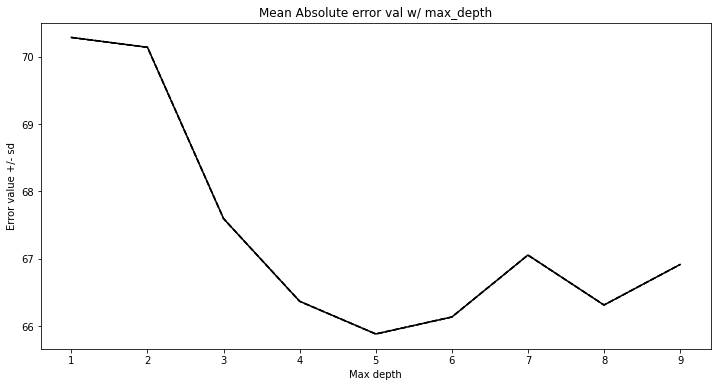

In [ ]:

#DETERMINING BEST MAX_DEPTH VALUE BY ERROR VALUES

x = airbnb_df.drop("price", axis=1)
y = airbnb_df["price"]

X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.20, random_state=42)

error_list = []
error_SD_list = []

for depth in range (1, 10):
  model = DecisionTreeRegressor(max_depth=depth)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_remaining)
  error=mean_absolute_error(y_remaining, y_pred)
  error_list.append(error.mean())
  error_SD_list.append(error.std())

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error_list, color='black', linestyle='solid')
plt.plot(range(1, 10), np.array(error_list) + np.array(error_SD_list),color='black', linestyle='dashed')
plt.plot(range(1, 10), np.array(error_list) - np.array(error_SD_list),color='black', linestyle='dashed' )
plt.fill_between(range(1, 10), np.array(error_list) + np.array(error_SD_list),
                 np.array(error_list) - np.array(error_SD_list), alpha=0.2, facecolor ='b')
plt.plot()
plt.title('Mean Absolute error val w/ max_depth')  
plt.xlabel('Max depth')  
plt.ylabel('Error value +/- sd') 
plt.show()

As we can see error value is lowest at max depth = 5 . So we are going to use 5 as our parameter.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
x = airbnb_df.drop("price", axis=1)
y = airbnb_df["price"]

X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42) 

regression_tree=DecisionTreeRegressor(max_depth=5)
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_tree = regression_tree.predict(X_remaining)

from sklearn.metrics import mean_squared_error 

print ("MSE for test value", mean_squared_error(y_remaining, y_pred_tree))


y_pred_train = regression_tree.predict(X_train)

print ("MSE for train value"  ,mean_squared_error(y_train, y_pred_train))



MSE for test value 18447.47194989769
MSE for train value 30894.004059675077


Comparing predicted prices and actual prices from our dataset and forming a table as a result.

In [ ]:
df_tree=pd.DataFrame({'Actual':y_remaining, 'Predicted':y_pred_tree})
df_tree.head(100)

,Actual,Predicted
43017,169,171.796296
8953,150,146.413620
3266,151,146.413620
26509,70,116.583618
11872,110,87.684960
...,...,...
34368,120,87.684960
13079,35,87.684960
12004,110,146.413620
32166,50,91.427653


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_remaining, y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(y_remaining, y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_remaining, y_pred_tree)))


Mean Absolute Error: 65.88570303287078
Mean Squared Error: 18447.47194989769
Root Mean Squared Error: 135.82147087223612


In [ ]:
airbnb_df.head()

Now we standardize our data set to observe lower error values.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
#STANDARIZATION STEP FOR REDUCING ERROR VALUES

x = airbnb_df.drop("price", axis=1)
y = airbnb_df["price"]

scaler_x=StandardScaler()
x = scaler_x.fit_transform(x)

X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.20, random_state=42)

regression_standard_tree=DecisionTreeRegressor(max_depth=5)

regression_standard_tree.fit(X_train, y_train)

y_pred_standard_tree= regression_standard_tree.predict(X_remaining)

mae_tree = mean_absolute_error(y_remaining,y_pred_standard_tree)
print ("Error Values After Standardization: ")
print('Mean Absolute Error:', mae_tree)
print('Mean Squared Error:',metrics.mean_squared_error(y_remaining,y_pred_standard_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_remaining,y_pred_standard_tree)))


Error Values After Standardization: 
Mean Absolute Error: 65.88570303287078
Mean Squared Error: 18447.47194989769
Root Mean Squared Error: 135.82147087223612


# Results & Discussion


Let's plot our final tree.

[Text(279.0, 199.32, 'X[3] <= 0.8\nmse = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(236.07692307692307, 163.07999999999998, 'mse = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(321.9230769230769, 163.07999999999998, 'X[3] <= 1.75\nmse = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(171.69230769230768, 126.83999999999999, 'X[2] <= 4.95\nmse = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(85.84615384615384, 90.6, 'X[3] <= 1.65\nmse = 0.02\nsamples = 48\nvalue = 1.021'),
 Text(42.92307692307692, 54.359999999999985, 'mse = 0.0\nsamples = 47\nvalue = 1.0'),
 Text(128.76923076923077, 54.359999999999985, 'mse = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(257.53846153846155, 90.6, 'X[3] <= 1.55\nmse = 0.222\nsamples = 6\nvalue = 1.667'),
 Text(214.61538461538458, 54.359999999999985, 'mse = 0.0\nsamples = 3\nvalue = 2.0'),
 Text(300.46153846153845, 54.359999999999985, 'X[2] <= 5.45\nmse = 0.222\nsamples = 3\nvalue = 1.333'),
 Text(257.53846153846155, 18.119999999999976, 'mse = 0.0\nsamples = 2\nvalue = 1.0'),
 

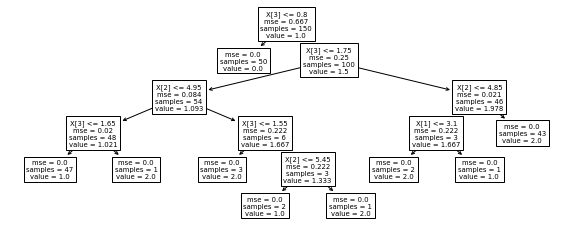

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeRegressor(random_state=0)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

Below are the comparison tables between predicted prices and actual prices from our datasets according to  2 different models that we created

In [ ]:
df_knn.head(10)

,Actual,Predicted
43017,169,167.857143
8953,150,138.428571
3266,151,149.071429
26509,70,111.357143
11872,110,98.928571
39487,48,327.857143
18401,252,299.571429
3123,150,156.071429
21223,75,73.357143
25174,50,99.142857


In [ ]:
df_tree.head(10)

,Actual,Predicted
43017,169,171.796296
8953,150,146.413620
3266,151,146.413620
26509,70,116.583618
11872,110,87.684960
39487,48,173.202847
18401,252,245.489908
3123,150,116.583618
21223,75,87.684960
25174,50,146.413620


Mean absolute error values for KNN and decision tree models are as follows;

In [ ]:
print("KNN MAE: ", mae_modelknn1)
print("Decision tree MAE: ", mae_tree)

KNN MAE:  68.33074534161491
Decision tree MAE:  65.88570303287078


To compare KNN and Decision tree; both are non-parametric methods and as it can be seen above, error rates we obtained from them were close to each other. But the error rate we obtained from decision tree model was slightly smaller.Decision Tree method was faster than Knn. Also in KNN model, we were able to find the error rate but we couldn't visualize the model as we did in decision tree. Since visualizing data and predictions are very important in data science, for this specific project we found using Decision Tree model for machine learning more efficient.

# Conclusion

Our assumption was to predict airbnb prices according to the neighborhood they are in. We suggested that factors like crime rate and education level of the neighborhood would affect the prices in that neighborhood and tried to create a model where we can predict prices with given crime rate and education level datasets. Our solutions were applicable since we were able to make predictions with mean absolute error value of 65. Eventhough we made predictions, the error value is not small enough,which is a disadvantage. It can be reduced even more. For that we could have add more datasets in our project, in order to strengthen our machine learning model. Since we are on the right track, we can reduce the error rate and create quite accurate predictions with the same models by using couple of more datasets.